In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import keras
from tensorflow.keras import layers, models, metrics
import random
import shutil
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# In Google colab, I used the following code after uploading natural_images file to Google Drive

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory= 'natural_images/train/',
    labels= 'inferred',
    label_mode= 'categorical',
    batch_size= 128,
    image_size=(128,128)
)

val_ds = keras.utils.image_dataset_from_directory(
    directory= 'natural_images/val/',
    labels= 'inferred',
    label_mode= 'categorical',
    batch_size= 128,
    image_size=(128,128)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory= 'natural_images/test/',
    labels= 'inferred',
    label_mode= 'categorical',
    batch_size= 128,
    image_size=(128,128)
)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_ds.class_names), activation='softmax')
])

In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 30
)

In [ ]:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())           # Append true labels
    y_pred.extend(np.argmax(preds, axis=1)) # Append predicted labels

y_true = np.array(y_true)
y_pred = np.array(y_pred)

y_true = np.argmax(y_true, axis=1)

In [ ]:
# Precision and Recall for each class
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

print("Class-wise Precision:")
for i, prec in enumerate(precision):
    print(f"{train_ds.class_names[i]}: {prec:.4f}")

print("\nClass-wise Recall:")
for i, rec in enumerate(recall):
    print(f"{train_ds.class_names[i]}: {rec:.4f}")

# Full Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=train_ds.class_names))

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_ds.class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

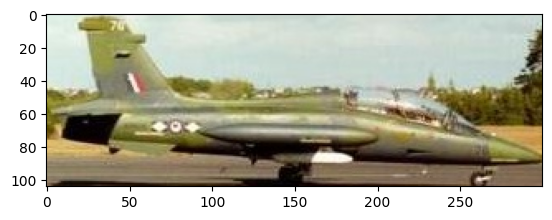

In [3]:
image = Image.open("natural_images/airplane/airplane_0000.jpg")
plt.imshow(image)